collision analysis

In [10]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



Collision Type Counts:
Alert
cas_hmw    12328
cas_ldw     6431
cas_pcw     1976
cas_fcw      590
Name: count, dtype: int64


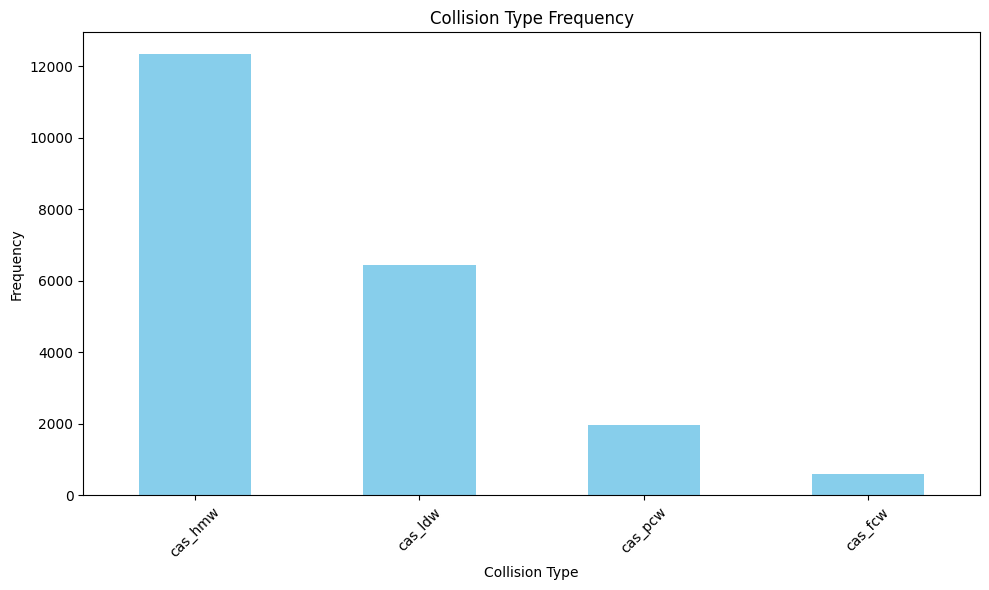

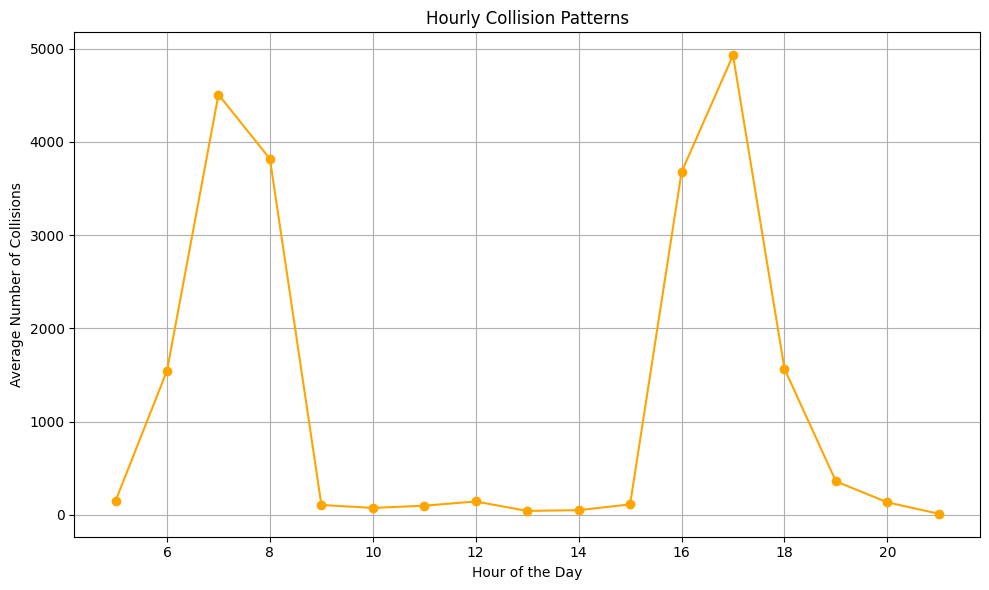

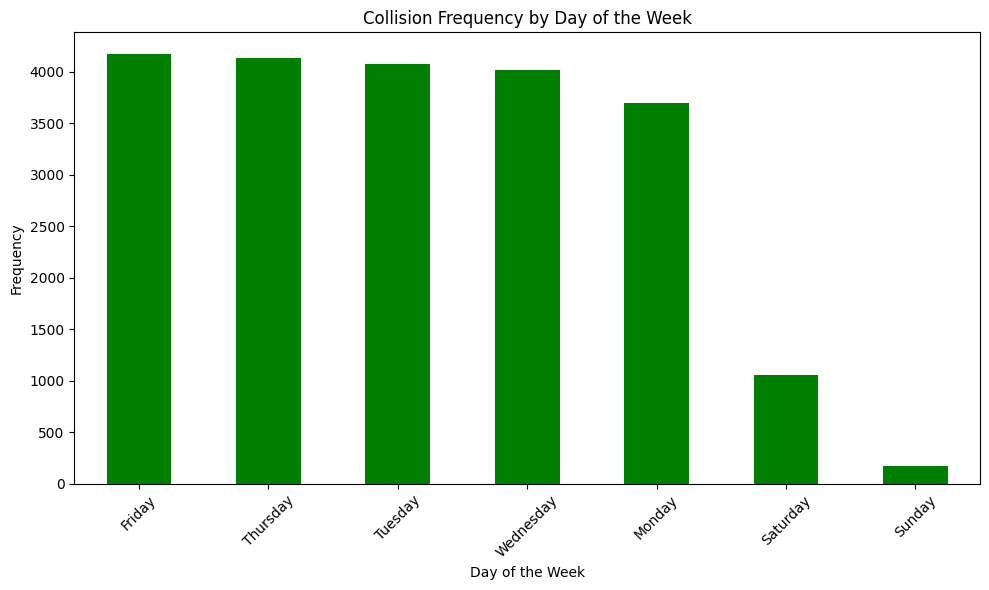

In [14]:

# Load your dataset into a pandas DataFrame (assuming it's in a CSV file)
data = pd.read_csv("C:/Users/kannan/Desktop/unnati_phase1_data_revised.csv")

# Calculate the frequency of each type of collision
collision_counts = data['Alert'].value_counts()
print("Collision Type Counts:")
print(collision_counts)

# Plot a bar chart to visualize the collision type counts
plt.figure(figsize=(10, 6))
collision_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Collision Type')
plt.ylabel('Frequency')
plt.title('Collision Type Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Collision_Type_Freaquency.png')
plt.show()

# Identify patterns or trends in collisions by time of day
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['Hour'] = data['Time'].dt.hour

# Calculate the average number of collisions per hour
hourly_collision_counts = data.groupby('Hour')['Alert'].count()

# Plot a line chart to visualize the hourly collision patterns
plt.figure(figsize=(10, 6))
hourly_collision_counts.plot(kind='line', marker='o', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Collisions')
plt.title('Hourly Collision Patterns')
plt.grid()
plt.tight_layout()
plt.show()

# Identify patterns or trends in collisions by day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()

# Calculate the frequency of collisions for each day of the week
day_of_week_counts = data['DayOfWeek'].value_counts()

# Plot a bar chart to visualize the collision counts by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Collision Frequency by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Vehicle Type Counts:
Vehicle
805     6875
5339    5842
2846    5686
3143    2904
1995      18
Name: count, dtype: int64


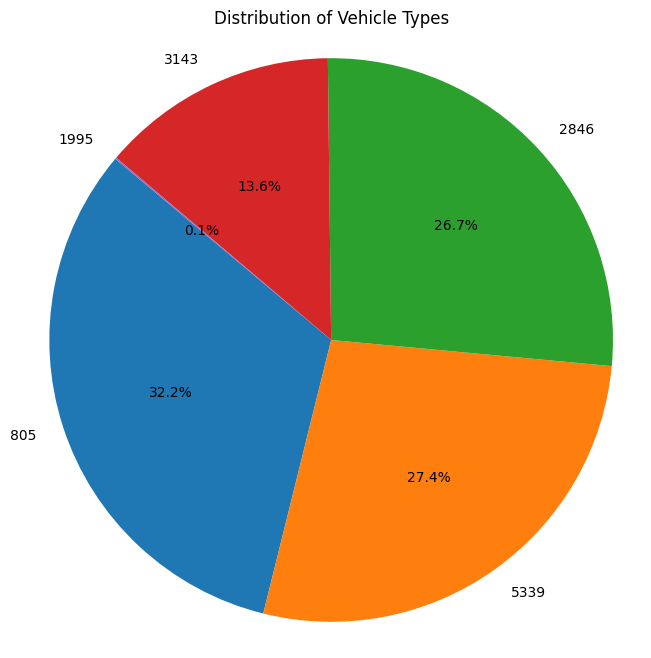

In [12]:


# Calculate the frequency of each vehicle type
vehicle_type_counts = data['Vehicle'].value_counts()
print("Vehicle Type Counts:")
print(vehicle_type_counts)

# Plot a pie chart to visualize the distribution of vehicle types
plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('Distribution of Vehicle Types')
plt.savefig("Distribution of VehicalType")
plt.show()


Correlation between Collision Types and Vehicle Types:
Vehicle  805   1995  2846  3143  5339
Alert                                
cas_fcw   158     1   145    82   204
cas_hmw  4227     8  2409  1567  4117
cas_ldw  2052     8  2741   876   754
cas_pcw   438     1   391   379   767

Average Speed by Vehicle Type:
Vehicle
805     37.860945
1995    25.388889
2846    43.105874
3143    37.617424
5339    34.897295
Name: Speed, dtype: float64

Hourly Trends by Vehicle Type:
Vehicle  805   1995  2846  3143  5339
Hour                                 
5          12     0    59    34    44
6         479     0   543   332   193
7        1247     9  1271   320  1661
8        1380     9   984   624   822
9           7     0    10    56    33
10          8     0     5    43    18
11         16     0    18     1    63
12          6     0     0    26   111
13          3     0     2    29     8
14         12     0     5    29     4
15         41     0     7    50    14
16       1429     0   977   345  

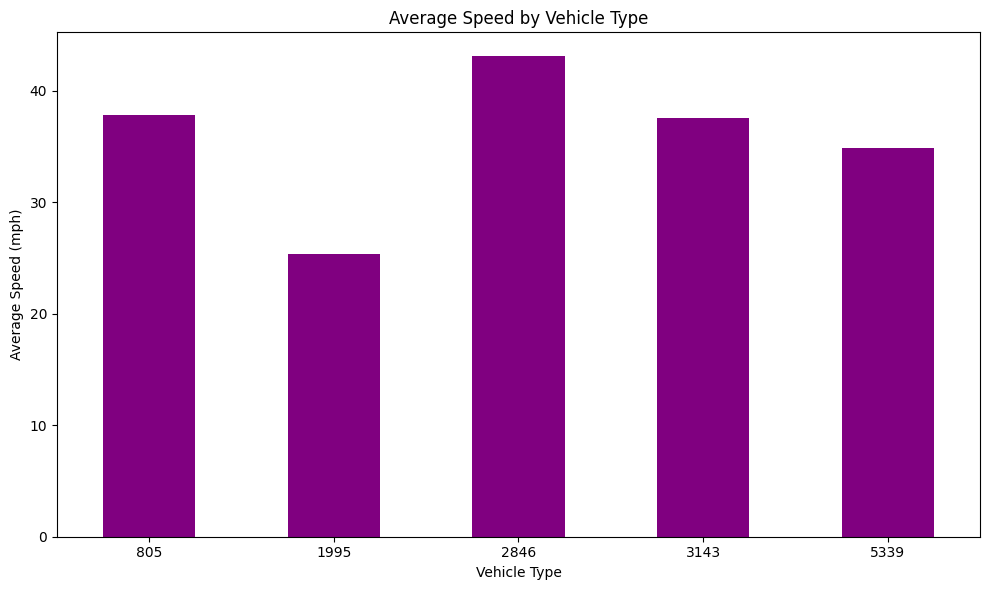

In [4]:


# Correlation with Collision Types
collision_vehicle_crosstab = pd.crosstab(data['Alert'], data['Vehicle'])
print("Correlation between Collision Types and Vehicle Types:")
print(collision_vehicle_crosstab)

# Average Speed by Vehicle Type
average_speed_by_vehicle = data.groupby('Vehicle')['Speed'].mean()
print("\nAverage Speed by Vehicle Type:")
print(average_speed_by_vehicle)

# Temporal Trends by Vehicle Type


hourly_vehicle_counts = data.groupby(['Hour', 'Vehicle']).size().unstack(fill_value=0)
print("\nHourly Trends by Vehicle Type:")
print(hourly_vehicle_counts)

# You can create visualizations for better understanding
# Example: Average Speed by Vehicle Type bar chart
plt.figure(figsize=(10, 6))
average_speed_by_vehicle.plot(kind='bar', color='purple')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Speed (mph)')
plt.title('Average Speed by Vehicle Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


     Alert       Date                Time        Lat       Long  Vehicle   
0  cas_ldw 2022-06-01 1900-01-01 05:36:36  12.887403  80.083412     2846  \
1  cas_ldw 2022-06-01 1900-01-01 05:36:47  12.892586  80.085794     2846   
2  cas_ldw 2022-06-01 1900-01-01 05:37:04  12.894932  80.087564     2846   
3  cas_ldw 2022-06-01 1900-01-01 05:37:31  12.898267  80.090062     2846   
4  cas_ldw 2022-06-01 1900-01-01 05:38:08  12.901594  80.092538     2846   

   Speed  Hour  DayOfWeek  
0     48     5  Wednesday  
1     58     5  Wednesday  
2     57     5  Wednesday  
3     49     5  Wednesday  
4     58     5  Wednesday  
Alert
cas_hmw    12328
cas_ldw     6431
cas_pcw     1976
cas_fcw      590
Name: count, dtype: int64


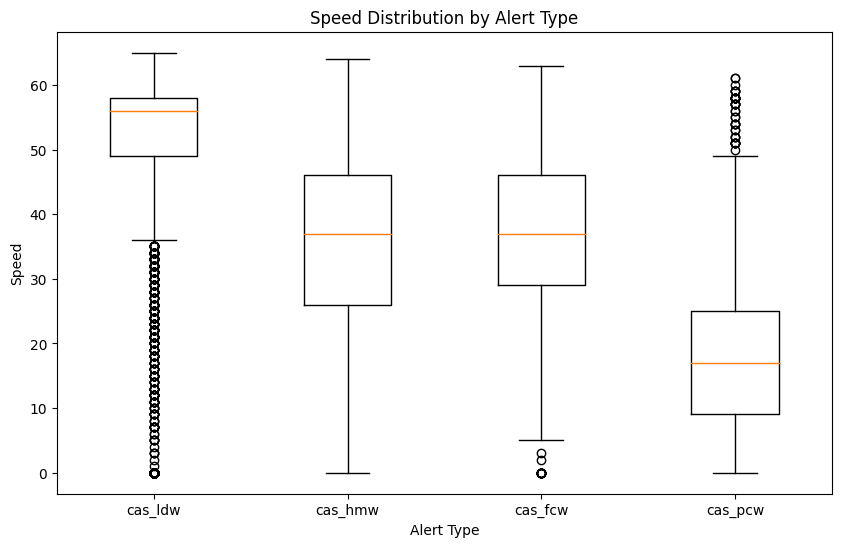

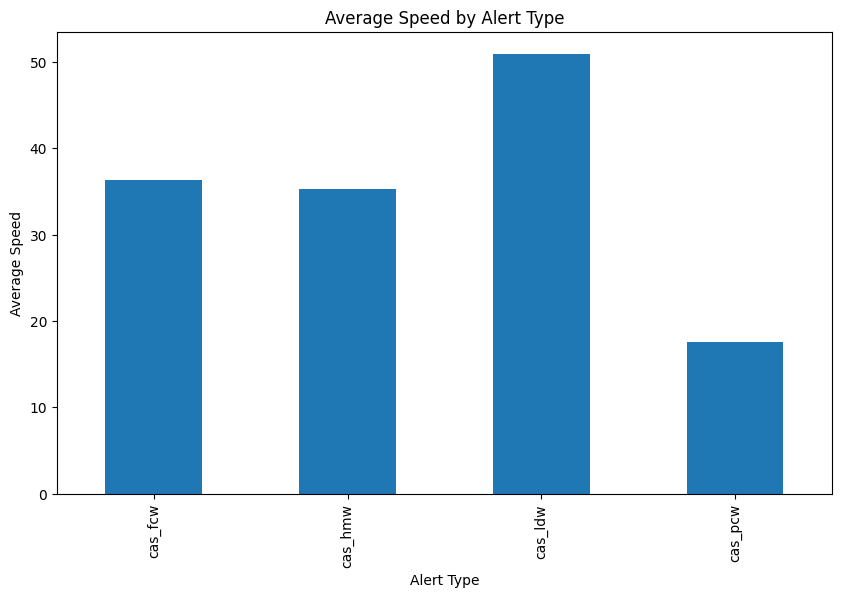

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file path)

# Explore the dataset and get an overview
print(data.head())  # Display the first few rows of the dataset
print(data['Alert'].value_counts())  # Count the occurrences of each alert type

# Data Visualization
plt.figure(figsize=(10, 6))

# Box plot to compare speed distribution for each alert type
plt.boxplot([data[data['Alert'] == alert]['Speed'] for alert in data['Alert'].unique()],
            labels=data['Alert'].unique())
plt.title('Speed Distribution by Alert Type')
plt.xlabel('Alert Type')
plt.ylabel('Speed')
plt.show()

# Bar chart to show the average speed for each alert type
avg_speed_by_alert = data.groupby('Alert')['Speed'].mean()
avg_speed_by_alert.plot(kind='bar', figsize=(10, 6))
plt.title('Average Speed by Alert Type')
plt.xlabel('Alert Type')
plt.ylabel('Average Speed')
plt.show()


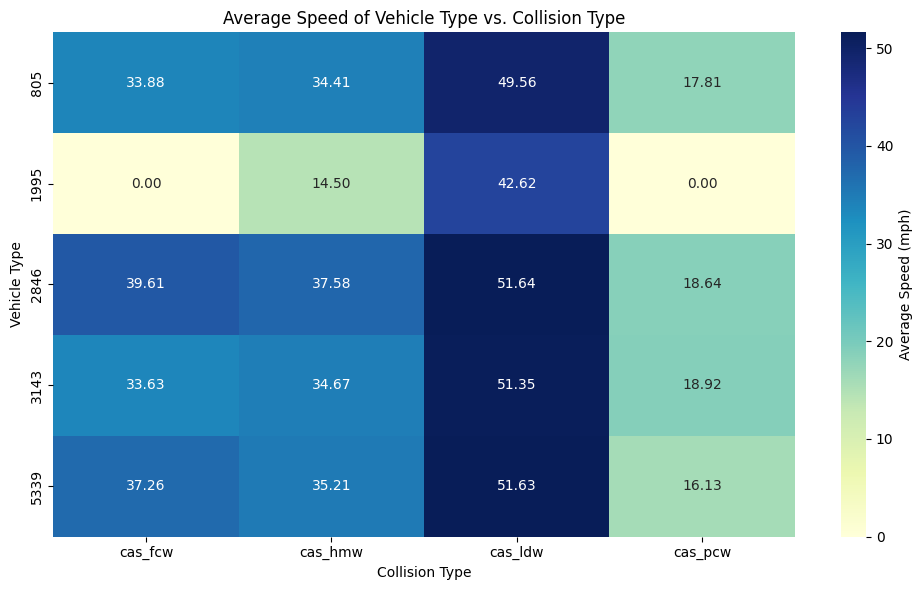

In [6]:

# Calculate the average speed for each combination of Vehicle Type and Collision Type
average_speed_table = data.groupby(['Vehicle', 'Alert'])['Speed'].mean().reset_index()

# Pivot the table to create a heatmap
pivot_table = average_speed_table.pivot(index='Vehicle', columns='Alert', values='Speed')

# Create a heatmap to visualize the average speed of each vehicle type vs. collision type
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Speed (mph)'})
plt.xlabel('Collision Type')
plt.ylabel('Vehicle Type')
plt.title('Average Speed of Vehicle Type vs. Collision Type')
plt.tight_layout()
plt.show()


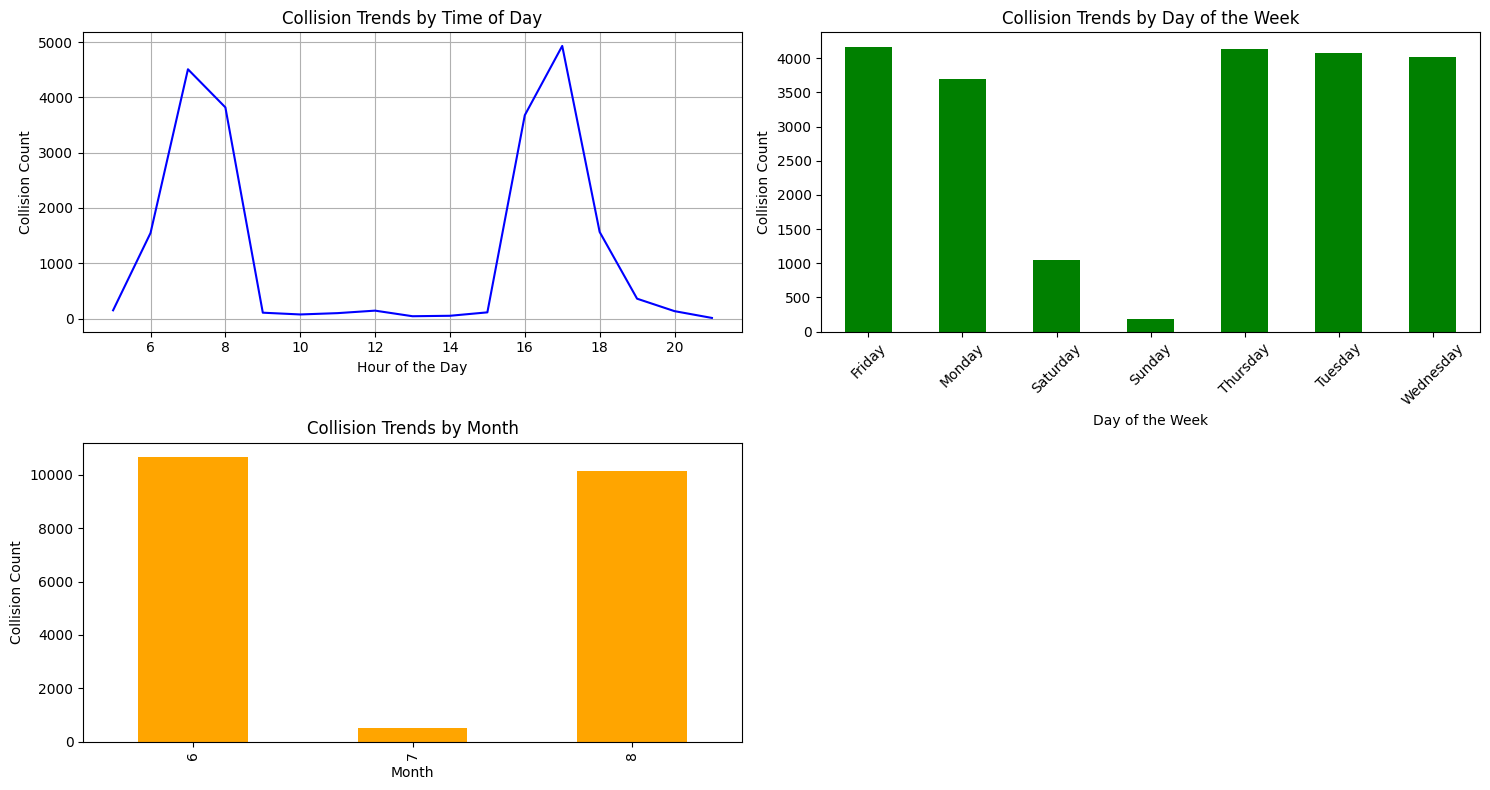

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame (assuming it's in a CSV file)


# Convert the "Date" column to a datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Extract additional date-related information
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

# Temporal Analysis by Time of Day
hourly_collision_counts = data.groupby('Hour')['Alert'].count()

# Temporal Analysis by Day of the Week
day_of_week_collision_counts = data.groupby('DayOfWeek')['Alert'].count()

# Temporal Analysis by Month
monthly_collision_counts = data.groupby('Month')['Alert'].count()

# Plot the temporal analysis
plt.figure(figsize=(15, 8))


# Plotting Temporal Analysis by Time of Day
plt.subplot(2, 2, 1)
hourly_collision_counts.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()

# Plotting Temporal Analysis by Day of the Week
plt.subplot(2, 2, 2)
day_of_week_collision_counts.plot(kind='bar', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Day of the Week')
plt.xticks(rotation=45)

# Plotting Temporal Analysis by Month
plt.subplot(2, 2, 3)
monthly_collision_counts.plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Month')

plt.tight_layout()
plt.savefig("collision_Trends.png")
plt.show()



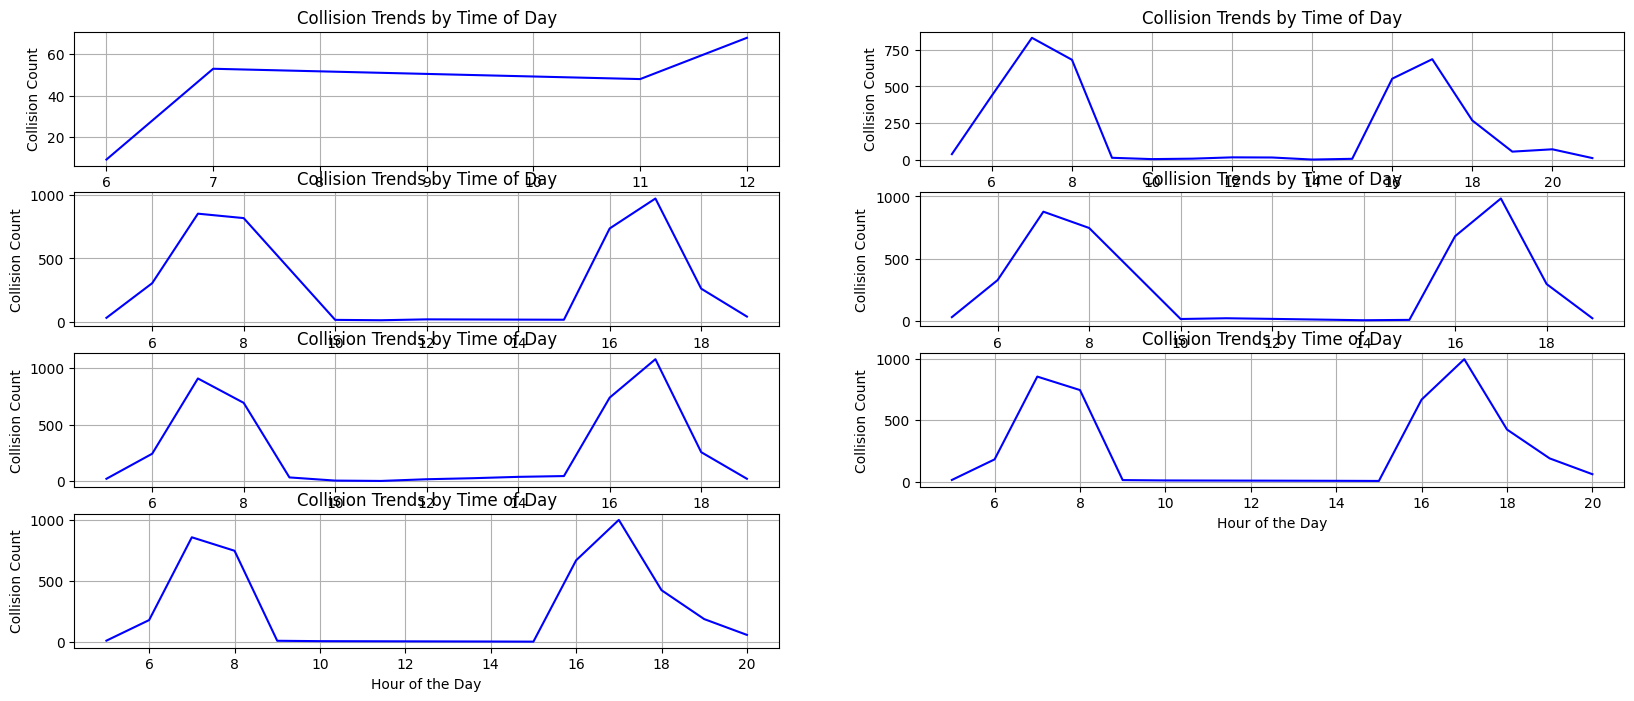

In [64]:
sun_day=data[data['DayOfWeek']=='Sunday']
mon_day=data[data['DayOfWeek']=='Monday']
tue_day=data[data['DayOfWeek']=='Tuesday']  
wed_day=data[data['DayOfWeek']=='Wednesday']
Thurs_day=data[data['DayOfWeek']=='Thursday']
fri_day=data[data['DayOfWeek']=='Friday']
sat_day=data[data['DayOfWeek']=='Saturday']
hourly_collision_counts_1 = sun_day.groupby('Hour')['Alert'].count()
hourly_collision_counts_2 = mon_day.groupby('Hour')['Alert'].count()
hourly_collision_counts_3 = tue_day.groupby('Hour')['Alert'].count()
hourly_collision_counts_4 = wed_day.groupby('Hour')['Alert'].count()
hourly_collision_counts_5 = Thurs_day.groupby('Hour')['Alert'].count()
hourly_collision_counts_6 = fri_day.groupby('Hour')['Alert'].count()
hourly_collision_counts_7 = sat_day.groupby('Hour')['Alert'].count()

# Plot the temporal analysis
plt.figure(figsize=(20, 8))


# Plotting Temporal Analysis by Time of Day
plt.subplot(4, 2, 1)
hourly_collision_counts_1.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()
plt.subplot(4, 2, 2)
hourly_collision_counts_2.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()
plt.subplot(4, 2, 3)
hourly_collision_counts_3.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()
plt.subplot(4, 2, 4)
hourly_collision_counts_4.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()

plt.subplot(4, 2, 5)
hourly_collision_counts_5.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()
plt.subplot(4, 2, 6)
hourly_collision_counts_6.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()
plt.subplot(4, 2, 7)
hourly_collision_counts_6.plot(kind='line', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Count')
plt.title('Collision Trends by Time of Day')
plt.grid()

Overall Average Speed: 38.40 mph
Overall Maximum Speed: 65 mph
Overall Minimum Speed: 0 mph

Collision Type: cas_ldw
Average Speed: 50.92 mph
Maximum Speed: 65 mph
Minimum Speed: 0 mph

Collision Type: cas_hmw
Average Speed: 35.32 mph
Maximum Speed: 64 mph
Minimum Speed: 0 mph

Collision Type: cas_fcw
Average Speed: 36.37 mph
Maximum Speed: 63 mph
Minimum Speed: 0 mph

Collision Type: cas_pcw
Average Speed: 17.53 mph
Maximum Speed: 61 mph
Minimum Speed: 0 mph


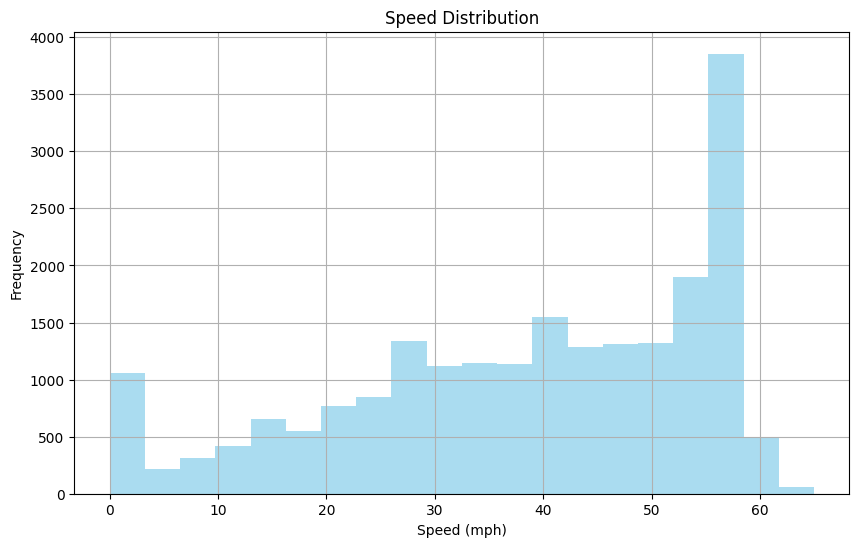

In [65]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate statistics for the entire dataset
average_speed = data['Speed'].mean()
max_speed = data['Speed'].max()
min_speed = data['Speed'].min()

print(f"Overall Average Speed: {average_speed:.2f} mph")
print(f"Overall Maximum Speed: {max_speed} mph")
print(f"Overall Minimum Speed: {min_speed} mph")

# Segment the data by collision type and analyze average speeds
collision_types = data['Alert'].unique()
for collision_type in collision_types:
    subset = data[data['Alert'] == collision_type]
    average_speed_collision = subset['Speed'].mean()
    max_speed_collision = subset['Speed'].max()
    min_speed_collision = subset['Speed'].min()
    
    print(f"\nCollision Type: {collision_type}")
    print(f"Average Speed: {average_speed_collision:.2f} mph")
    print(f"Maximum Speed: {max_speed_collision} mph")
    print(f"Minimum Speed: {min_speed_collision} mph")

# Plot a histogram to visualize the speed distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Speed'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')
plt.title('Speed Distribution')
plt.grid()
plt.show()


In [70]:
data.groupby('Time').value_count()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_count'

In [10]:
data[(data['Lat']==13.177723)&(data['Long']==80.313772)]

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,DayOfWeek,Month
8814,cas_hmw,2022-06-25,1900-01-01 18:30:22,13.177723,80.313772,5339,51,18,Saturday,6
8815,cas_ldw,2022-06-25,1900-01-01 18:30:34,13.177723,80.313772,5339,51,18,Saturday,6


In [11]:
side=data[(data["Alert"]=='cas_hmw')|(data["Alert"]=='cas_ldw')&(data['Speed']>50)].groupby(['Vehicle','Lat',"Long"]).count()
side[side>1].value_counts()


Alert  Date  Time  Speed  Hour  DayOfWeek  Month
2.0    2.0   2.0   2.0    2.0   2.0        2.0      1746
3.0    3.0   3.0   3.0    3.0   3.0        3.0       335
4.0    4.0   4.0   4.0    4.0   4.0        4.0       107
5.0    5.0   5.0   5.0    5.0   5.0        5.0        43
6.0    6.0   6.0   6.0    6.0   6.0        6.0        11
7.0    7.0   7.0   7.0    7.0   7.0        7.0         2
8.0    8.0   8.0   8.0    8.0   8.0        8.0         1
10.0   10.0  10.0  10.0   10.0  10.0       10.0        1
12.0   12.0  12.0  12.0   12.0  12.0       12.0        1
Name: count, dtype: int64

In [12]:
sp=data[data['Speed']>50]
sp[sp['Vehicle']==2846 ].groupby(['Alert','Lat','Long']).va.sort_values()

AttributeError: 'DataFrameGroupBy' object has no attribute 'va'

In [13]:
data.head(20)

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,DayOfWeek,Month
0,cas_ldw,2022-06-01,1900-01-01 05:36:36,12.887403,80.083412,2846,48,5,Wednesday,6
1,cas_ldw,2022-06-01,1900-01-01 05:36:47,12.892586,80.085794,2846,58,5,Wednesday,6
2,cas_ldw,2022-06-01,1900-01-01 05:37:04,12.894932,80.087564,2846,57,5,Wednesday,6
3,cas_ldw,2022-06-01,1900-01-01 05:37:31,12.898267,80.090062,2846,49,5,Wednesday,6
4,cas_ldw,2022-06-01,1900-01-01 05:38:08,12.901594,80.092538,2846,58,5,Wednesday,6
5,cas_ldw,2022-06-01,1900-01-01 05:38:21,12.903877,80.094272,2846,54,5,Wednesday,6
6,cas_ldw,2022-06-01,1900-01-01 05:38:41,12.906194,80.095953,2846,58,5,Wednesday,6
7,cas_ldw,2022-06-01,1900-01-01 05:40:21,12.915664,80.103135,2846,62,5,Wednesday,6
8,cas_ldw,2022-06-01,1900-01-01 05:41:17,12.918451,80.109058,2846,51,5,Wednesday,6
9,cas_ldw,2022-06-01,1900-01-01 05:41:25,12.919239,80.110028,2846,47,5,Wednesday,6


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess your datase
# Perform feature engineering and data splitting as needed

# Define the features (speed, location) and target (Alert)
X = data[['Speed', 'Lat', 'Long']]
y = data['Alert']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can further analyze and visualize the results here


Accuracy: 0.7594372801875733


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your dataset

# Ensure you have columns "Alert" and "Speed"

# Define the features (Speed) and target (Alert)
X = data[['Speed']]
y = data['Alert']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression Classifier
clf = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report for more detailed metrics
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Analyze model coefficients if you want to understand the impact of speed levels on collision types
coefficients = clf.coef_
print('Model Coefficients:', coefficients)

# You can further analyze and visualize the results here


Accuracy: 0.6776084407971864
              precision    recall  f1-score   support

     cas_fcw       0.00      0.00      0.00       126
     cas_hmw       0.72      0.78      0.75      2480
     cas_ldw       0.66      0.71      0.69      1269
     cas_pcw       0.22      0.11      0.15       390

    accuracy                           0.68      4265
   macro avg       0.40      0.40      0.40      4265
weighted avg       0.63      0.68      0.65      4265

Model Coefficients: [[-0.00410806]
 [-0.00915077]
 [ 0.09260619]
 [-0.07934735]]


c:\Users\kannan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kannan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kannan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [31]:
filtered_data = data[data['Hour'].between(6, 8) | data['Hour'].between(16, 18)]
filtered_data_morning = data[data['Hour'].between(6, 8) ]
filtered_data_evening= data[ data['Hour'].between(16, 18)]
filtered_data_morning.to_csv("filtered_data_morning.csv",index=False)
filtered_data_evening.to_csv("filtered_data_evening.csv",index=False)



In [32]:
filtered_data

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,DayOfWeek,Month
14,cas_ldw,2022-06-01,1900-01-01 06:04:38,12.957073,80.143560,2846,39,6,Wednesday,6
15,cas_ldw,2022-06-01,1900-01-01 06:05:10,12.878990,80.080324,805,13,6,Wednesday,6
16,cas_ldw,2022-06-01,1900-01-01 06:06:41,12.873922,80.078184,805,59,6,Wednesday,6
17,cas_ldw,2022-06-01,1900-01-01 06:07:12,12.867110,80.075508,805,58,6,Wednesday,6
18,cas_ldw,2022-06-01,1900-01-01 06:07:50,12.855921,80.069229,805,58,6,Wednesday,6
...,...,...,...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,1900-01-01 18:12:29,13.070668,80.265539,5339,30,18,Wednesday,8
21321,cas_pcw,2022-08-31,1900-01-01 18:13:01,13.071554,80.264616,5339,34,18,Wednesday,8
21322,cas_hmw,2022-08-31,1900-01-01 18:15:05,13.071181,80.258729,5339,24,18,Wednesday,8
21323,cas_pcw,2022-08-31,1900-01-01 18:16:35,13.067723,80.255065,5339,23,18,Wednesday,8


In [33]:
filtered_data.to_csv("filtered_data.csv",index=False)

In [34]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim

# Create a Geocoder object
geolocator = Nominatim(user_agent="myGeocoder")
map = folium.Map(location=[12.957073,	80.143560	])

# Iterate over the DataFrame
for index, row in filtered_data.iterrows():

    # Get the latitude and longitude from the row
    latitude = row['Lat']
    longitude = row['Long']

    # Get the address of the location
    location = geolocator.reverse([latitude, longitude])

    # Create a Folium map of the location
    map = folium.Map(location=[latitude, longitude])

    # Add markers for hospitals and schools near the location
    for place in ["hospital", "school"]:
        query = '{} near {}'.format(place, location)

        try:
            results = geolocator.geocode(query)

            if results:
                lat = results.latitude
                lng = results.longitude
                label = place

                folium.Marker([lat, lng], popup=label).add_to(map)
            else:
                print("No results found for query:", query)
        except Exception as e:
            print("Error geocoding:", e)

    # Display the map
map.save("location_map.html")


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=12.957073&lon=80.14356&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001927F504510>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [ ]:
# group the Lat,Long and sort in decending order
data.groupby(['Lat','Long']).size().sort_values(ascending=False).head(20)


Lat        Long     
12.992198  80.182455    16
12.875621  80.082901    13
12.927230  80.118412    12
13.057336  80.257715    10
13.025699  80.230298    10
13.011249  80.218108     9
13.063737  80.250966     8
12.875630  80.082909     7
13.062136  80.263221     7
12.979753  80.227250     7
13.063779  80.250857     7
13.072698  80.262216     7
12.983254  80.127314     6
13.028477  80.235951     6
12.984200  80.171294     6
12.864715  80.074529     6
12.795946  80.020812     6
12.920214  80.111140     6
13.067206  80.253724     6
13.029250  80.266478     6
dtype: int64

In [ ]:
#only show find the alert in each location count value greater than 1
fil=data.groupby(['Lat','Long']).size().sort_values(ascending=False)[data.groupby(['Lat','Long']).size().sort_values(ascending=False)>4]


In [ ]:
fil.value_counts()

5     42
6     14
7      5
10     2
16     1
13     1
12     1
9      1
8      1
Name: count, dtype: int64

In [35]:
fi=filtered_data.groupby(['Lat','Long']).size().sort_values(ascending=False)[data.groupby(['Lat','Long']).size().sort_values(ascending=False)>4]

In [36]:
fil

Lat        Long     
12.992198  80.182455    16
12.875621  80.082901    13
12.927230  80.118412    12
13.057336  80.257715    10
13.025699  80.230298    10
                        ..
13.011303  80.218092     5
12.921173  80.166937     5
12.942722  80.133311     5
13.016094  80.259456     5
13.023387  80.107588     5
Length: 68, dtype: int64

In [37]:
c=fil[fil>7].reset_index()
c[['Lat','Long']]


,Lat,Long
0,12.992198,80.182455
1,12.875621,80.082901
2,12.927230,80.118412
3,13.057336,80.257715
4,13.025699,80.230298
5,13.011249,80.218108
6,13.063737,80.250966


In [53]:
c=c.head(6)
c

,Lat,Long,0
0,12.992198,80.182455,16
1,12.875621,80.082901,13
2,12.927230,80.118412,12
3,13.057336,80.257715,10
4,13.025699,80.230298,10
5,13.011249,80.218108,9


In [39]:
 
#show filter_data that contain c['Lat,'long']
black_mark=filtered_data[filtered_data['Lat'].isin(c['Lat']) & filtered_data['Long'].isin(c['Long'])].reset_index()




In [40]:
black_mark

,index,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,DayOfWeek,Month
0,2669,cas_hmw,2022-06-07,1900-01-01 07:57:28,12.992198,80.182455,2846,37,7,Tuesday,6
1,2670,cas_fcw,2022-06-07,1900-01-01 07:58:43,12.992198,80.182455,2846,37,7,Tuesday,6
2,2671,cas_hmw,2022-06-07,1900-01-01 07:58:57,12.992198,80.182455,2846,37,7,Tuesday,6
3,2672,cas_hmw,2022-06-07,1900-01-01 07:59:05,12.992198,80.182455,2846,37,7,Tuesday,6
4,2673,cas_hmw,2022-06-07,1900-01-01 07:59:19,12.992198,80.182455,2846,37,7,Tuesday,6
...,...,...,...,...,...,...,...,...,...,...,...
73,12971,cas_ldw,2022-08-05,1900-01-01 07:49:14,13.011249,80.218108,5339,48,7,Friday,8
74,12973,cas_ldw,2022-08-05,1900-01-01 07:49:16,13.011249,80.218108,5339,48,7,Friday,8
75,12974,cas_ldw,2022-08-05,1900-01-01 07:49:24,13.011249,80.218108,5339,48,7,Friday,8
76,12975,cas_ldw,2022-08-05,1900-01-01 07:49:42,13.011249,80.218108,5339,48,7,Friday,8


In [41]:
#groupby Lat and Long to find the average speed in black_mark


black_mark.groupby(["Lat",'Long'])['Speed'].describe()

,,count,mean,std,min,25%,50%,75%,max
Lat,Long,,,,,,,,
12.875621,80.082901,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.927230,80.118412,12.0,22.0,0.0,22.0,22.0,22.0,22.0,22.0
12.992198,80.182455,16.0,37.0,0.0,37.0,37.0,37.0,37.0,37.0
13.011249,80.218108,9.0,48.0,0.0,48.0,48.0,48.0,48.0,48.0
13.025699,80.230298,10.0,17.0,0.0,17.0,17.0,17.0,17.0,17.0
13.057336,80.257715,10.0,13.0,0.0,13.0,13.0,13.0,13.0,13.0
13.063737,80.250966,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#filter the data from black_mark whose Lat and Long value is 12.875621,	80.082901
black_mark[(black_mark['Lat']==12.875621)&( black_mark['Long']==80.082901)].groupby('Vehicle').value_counts()


Vehicle  index  Alert    Date        Time                 Lat        Long       Speed  Hour  DayOfWeek  Month
2846     3311   cas_hmw  2022-06-09  1900-01-01 06:59:42  12.875621  80.082901  0      6     Thursday   6        1
         3312   cas_pcw  2022-06-09  1900-01-01 07:00:25  12.875621  80.082901  0      7     Thursday   6        1
         3313   cas_ldw  2022-06-09  1900-01-01 07:01:01  12.875621  80.082901  0      7     Thursday   6        1
         3314   cas_hmw  2022-06-09  1900-01-01 07:01:03  12.875621  80.082901  0      7     Thursday   6        1
         3315   cas_ldw  2022-06-09  1900-01-01 07:01:40  12.875621  80.082901  0      7     Thursday   6        1
         3316   cas_hmw  2022-06-09  1900-01-01 07:01:52  12.875621  80.082901  0      7     Thursday   6        1
         3317   cas_ldw  2022-06-09  1900-01-01 07:02:56  12.875621  80.082901  0      7     Thursday   6        1
         3318   cas_ldw  2022-06-09  1900-01-01 07:03:00  12.875621  80.082901  0    

In [28]:

black_mark[(black_mark['Lat']==13.063737)&( black_mark['Long']==80.250966)].groupby('Vehicle').value_counts()

NameError: name 'black_mark' is not defined

In [29]:
# dt=data.groupby(['Vehicle','Lat','Long','Alert']).count()
# dt[dt>1]
# import pandas as pd

# # Assuming 'data' is your DataFrame

# Perform the groupby operation and count
grouped = data.groupby(['Vehicle', 'Lat', 'Long', 'Alert']).size().reset_index(name='Count')

# Filter rows where Count is greater than 1
filtered_data = grouped[grouped['Count'] > 2]

# Display the filtered data
print(filtered_data.sort_values())


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [30]:
black_mark.groupby(['Vehicle','Lat','Long','Alert']).count()

NameError: name 'black_mark' is not defined

In [37]:
import matplotlib as plt
import folium
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
import time


In [54]:
#initialize geolocater
geolocator = Nominatim(user_agent="myGeocoder")
latitude=12.992198
longitude=80.182455
# Create a folium map centered around the first location in the DataFrame
map = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.Marker([latitude,longitude],).add_to(map)
#folium marker colour as red
folium.CircleMarker([latitude,longitude],radius=5,color='red',fill=True,fill_color='red',fill_opacity=0.5).add_to(map)

custom_icon = folium.Icon(color='green')

# Add markers for hospitals and schools near the location
for index,row in c.iterrows():
    latitude=row['Lat']
    longitude=row['Long']
    folium.Marker([latitude,longitude],).add_to(map)
#folium marker colour as red
    folium.CircleMarker([latitude,longitude],radius=5,color='red',fill=True,fill_color='red',fill_opacity=0.5).add_to(map)
    Location=geolocator.reverse((latitude,longitude))
    for place in ["Hospital", "school","Airport","Railway Station","Bus Stand","collage",]:
        query = '{} near {}'.format(place, Location)

        # Create the geocode for the query

        try:
                results = geolocator.geocode(query)

                if results:
                    lat = results.latitude
                    lng = results.longitude
                    label = place
                    folium.Marker([lat, lng], popup=label,icon=folium.Icon(color='green')).add_to(map)

        except Exception as e:
            print("Error geocoding:", e)
map

Error geocoding: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=school+near+Grand+Southern+Trunk+Road%2C+CMWSSB+Division+201%2C+St.+Thomas+Mount+Cantonment%2C+Zone+12+Alandur%2C+St.+Thomas+Mount+Cantonment%2C+Alandur%2C+Chennai+District%2C+Tamil+Nadu%2C+600027%2C+India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Hospital+near+Namma+Kudumbham%2C+29%2F42%2C+Thiru+Vi+Ka+Road%2C+Ward+111%2C+Zone+9+Teynampet%2C+Chennai%2C+Chennai+District%2C+Tamil+Nadu%2C+600014%2C+India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443):

In [55]:
map.save("place_near_collision.html")

In [52]:
import folium
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="myGeocoder")
latitude = 12.992198
longitude = 80.182455

# Create a folium map centered around the first location in the DataFrame
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add a marker for the initial location (red circle)
folium.Marker([latitude, longitude]).add_to(map)
folium.CircleMarker([latitude, longitude], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.5).add_to(map)



# Add markers for hospitals and schools near the location
for index, row in c.iterrows():
    latitude = row['Lat']
    longitude = row['Long']
    
    # Add a marker with the green circle (assuming it's a different category)
    folium.Marker([latitude, longitude], icon=folium.Icon(color='green')).add_to(map)
    folium.CircleMarker([latitude, longitude], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.5).add_to(map)

    # Reverse geocode the location
    Location = geolocator.reverse((latitude, longitude))

    # Define the categories you want to search for
    categories = ["Hospital", "School", "Airport", "Railway Station", "Bus Stand", "College"]

    for category in categories:
        query = f'{category} near {Location}'

        # Create the geocode for the query
        try:
            results = geolocator.geocode(query)

            if results:
                lat = results.latitude
                lng = results.longitude
                label = category
                distance = geodesic((latitude, longitude), (lat, lng)).kilometers
                # Add a marker with a popup showing the category and distance
                folium.Marker([lat, lng], popup=f'{category} ({distance:.2f} km)',icon=folium.Icon(color='green')).add_to(map)
        except Exception as e:
            print(f"Error geocoding {category}: {e}")

# Display the map
map


Error geocoding Bus Stand: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Bus+Stand+near+Grand+Southern+Trunk+Road%2C+CMWSSB+Division+201%2C+St.+Thomas+Mount+Cantonment%2C+Zone+12+Alandur%2C+St.+Thomas+Mount+Cantonment%2C+Alandur%2C+Chennai+District%2C+Tamil+Nadu%2C+600027%2C+India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Railway Station: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Railway+Station+near+Namma+Kudumbham%2C+29%2F42%2C+Thiru+Vi+Ka+Road%2C+Ward+111%2C+Zone+9+Teynampet%2C+Chennai%2C+Chennai+District%2C+Tamil+Nadu%2C+600014%2C+India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Bus Stand: HTTPSConnectionPool(

In [51]:
import folium
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# Initialize geolocator
geolocator = Nominatim(user_agent="myGeocoder")
latitude = 12.992198
longitude = 80.182455

# Create a folium map centered around the first location in the DataFrame
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add a marker for the initial location (red circle)
folium.Marker([latitude, longitude]).add_to(map)
folium.CircleMarker([latitude, longitude], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.5).add_to(map)

# Define custom icons for different categories
hospital_icon = folium.Icon(color='blue', icon='hospital')
school_icon = folium.Icon(color='green', icon='book')
airport_icon = folium.Icon(color='purple', icon='plane')
station_icon = folium.Icon(color='orange', icon='train')

# Add markers for hospitals and schools near the location
for index, row in c.iterrows():
    place_name = row['Place Name']
    latitude = row['Lat']
    longitude = row['Long']
    
    # Add a marker with the green circle (assuming it's a different category)
    folium.Marker([latitude, longitude], icon=folium.Icon(color='green')).add_to(map)
    folium.CircleMarker([latitude, longitude], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.5).add_to(map)

    # Reverse geocode the location
    location = geolocator.reverse((latitude, longitude))

    # Define the categories you want to search for
    categories = ["Hospital", "School", "Airport", "Railway Station", "Bus Stand", "College"]

    for category in categories:
        query = f'{category} near {location}'

        # Create the geocode for the query
        try:
            results = geolocator.geocode(query)

            if results:
                lat = results.latitude
                lng = results.longitude
                label = category

                # Calculate the distance using geodesic from geopy
                distance = geodesic((latitude, longitude), (lat, lng)).kilometers



                # Add a marker with a popup showing the category and distance
                folium.Marker([lat, lng], popup=f'{category} ({distance:.2f} km)', icon=icon).add_to(map)

        except Exception as e:
            print(f"Error geocoding {category}: {e}")

# Display the map
map


KeyError: 'Place Name'